## Surrogates

In [45]:
using Surrogates, LinearAlgebra, StaticArrays, Plots

   Resolving package versions...


  No Changes to `~/Repositories/Julia_by_Notebooks/Project.toml`


  No Changes to `~/Repositories/Julia_by_Notebooks/Manifest.toml`


## Inteprolation

In [98]:
# Points 
num_points = 200
xpoints = [rand() for x in 1:num_points]
min_x, max_x = extrema(xpoints)
ypoints = sort!([rand() for y in 1:num_points]) 
min_y, max_y = extrema(ypoints)
lb = [min_x, min_y]
ub = [max_x, max_y]
points = [SVector(xpoints[i], ypoints[i]) for i in 1:num_points  ]

# Field to interpolate
scalar_field(x,y) = 2x*y + log(x)
scalar_field_values = [scalar_field(p...) for p in points]

# RBS
itp = RadialBasis(points,scalar_field_values,lb,ub, rad = cubicRadial())
itp

(::RadialBasis{Surrogates.var"#3#4", Int64, Vector{SVector{2, Float64}}, Vector{Float64}, Vector{Float64}, Vector{Float64}, Transpose{Float64, Vector{Float64}}, Float64, Bool}) (generic function with 1 method)

In [99]:
# Generate grid points for evaluation
ngrid = 50
xgrid = range(min_x, max_x, length = ngrid)
ygrid = range(min_y, max_y, length = ngrid)
grid_points = [SVector(x, y) for x in xgrid, y in ygrid]

# Compute interpolated values and exact values
interpolated_values = [itp(p) for p in grid_points]
exact_values = [scalar_field(p...) for p in grid_points]

# Compute error between interpolated values and exact values
error = interpolated_values .- exact_values
relative_error = abs.(interpolated_values .- exact_values) ./ abs.(exact_values)

50×50 Matrix{Float64}:
  0.0467532    0.0350694   0.123219    …  0.228462     0.223056
  0.326543     0.19001     0.0449641      0.000641331  0.00873375
  0.185515     0.0763296   0.0194043      0.058083     0.0370918
  0.0426647    0.00582015  0.00243309     0.079483     0.0483714
  0.0122396    0.0180565   5.4777e-5      0.0478641    0.00773372
  0.00227174   0.00461521  0.0039781   …  0.00370279   0.0491099
  0.0183328    0.0120793   0.0138076      0.0515769    0.0987095
  0.0245858    0.0193746   0.0193414      0.0940441    0.141434
  0.0238142    0.0187311   0.0179728      0.131167     0.177854
  0.0190642    0.0135024   0.0119368      0.162187     0.207778
  ⋮                                    ⋱               
  0.2111       0.082533    0.00275802     0.00924277   0.00970309
  0.307185     0.140224    0.00967675     0.011106     0.011488
  0.446575     0.220628    0.00617018     0.0123918    0.0124904
  0.674173     0.366783    0.105497       0.0126963    0.0123308
  1.11081    

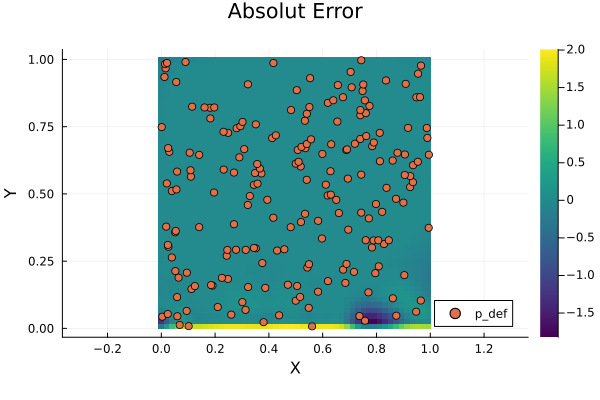

In [100]:
heatmap(xgrid, ygrid, error, aspect_ratio = :equal, color = :viridis, xlabel = "X", ylabel = "Y", title = "Absolut Error")
scatter!(getindex.(points,1), getindex.(points,2), marker = :circle, label="p_def")

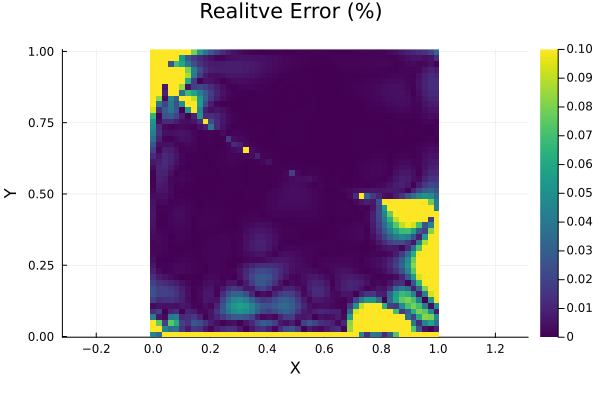

In [102]:
heatmap(xgrid, ygrid, relative_error, aspect_ratio = :equal, color = :viridis, xlabel = "X", ylabel = "Y", title = "Realitve Error (%) ", clims = (0,.10))
